<a href="https://colab.research.google.com/github/jamesqiu2021/DSCI-401-QW/blob/main/HW4-QW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Answer the questions below:
#1(a) Use the HELPrct data from the mosaicData to calculate the mean of all numeric variables (be sure to exclude missing values).

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
HELPrct=pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/HELPrct.csv")
HELPrct.head()
Teams = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/Teams.csv")
Teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [9]:

HELPrct.select_dtypes(include=np.number).dropna(how="any").apply(np.mean,axis=0)


age                  36.350427
anysubstatus          0.794872
cesd                 34.658120
d1                    3.350427
daysanysub           65.880342
dayslink            260.230769
drugrisk              2.538462
e2b                   2.692308
female                0.213675
i1                   19.521368
i2                   25.854701
id                  215.709402
indtot               36.846154
linkstatus            0.358974
mcs                  28.741577
pcs                  46.243519
pss_fr                5.871795
sexrisk               4.931624
avg_drinks           19.521368
max_drinks           25.854701
hospitalizations      3.350427
dtype: float64

#1(b) Find the mean of all the numeric variables stratified by sex and age group where age groups are defined as ranges of 10 years (i.e. 0-10,10-20, 20-30, etc).

In [10]:
ageBreaks = np.arange(0,120,10)
HELPrct_agegroup = HELPrct
HELPrct_agegroup ['age_group']= pd.cut(HELPrct_agegroup["age"],bins = ageBreaks)
HELPrct3 = HELPrct_agegroup.groupby(["sex","age_group"]).apply(np.mean,axis=0).select_dtypes(include=np.number).dropna(how="any")
HELPrct3


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


age  anysubstatus       cesd        d1  daysanysub  \
sex    age_group                                                             
female (20, 30]   27.086957      0.769231  38.652174  2.304348   67.153846   
       (30, 40]   34.982456      0.730769  36.596491  3.631579   91.769231   
       (40, 50]   45.500000      0.600000  35.583333  4.333333   85.666667   
       (50, 60]   56.666667      0.666667  39.333333  3.000000   77.000000   
male   (10, 20]   19.666667      1.000000  38.666667  1.000000   98.500000   
       (20, 30]   26.711111      0.785714  32.211111  1.933333   77.928571   
       (30, 40]   35.143713      0.789474  30.550898  2.568862   73.627660   
       (40, 50]   44.109589      0.809524  32.465753  4.452055   69.487805   
       (50, 60]   55.384615      0.750000  34.307692  6.307692   45.000000   

                    dayslink  drugrisk       e2b  female         i1  ...  \
sex    age_group                                                     ...   
female (20, 30]   295.700000  2.521739  2.500000     1.0   8.304348  ...   
       (30, 40]   271.709091  1.543860  1.764706     1.0  16.877193  ...   
       (40, 50]   244.608696  1.708333  2.166667     1.0  17.458333  ...   
       (50, 60]   261.666667  0.000000  1.500000     1.0   8.666667  ...   
male   (10, 20]   264.333333  0.000000  8.000000     0.0  21.333333  ...   
       (20, 30]   263.764706  3.022472  2.159091     0.0  12.344444  ...   
       (30, 40]   245.289308  1.293413  2.560976     0.0  19.568862  ...   
       (40, 50]   246.757143  2.178082  3.027778     0.0  21.890411  ...   
       (50, 60]   262.307692  1.692308  3.125000     0.0  36.384615  ...   

                          id     indtot  linkstatus        mcs        pcs  \
sex    age_group                                                            
female (20, 30]   183.347826  33.130435    0.250000  27.039288  47.081356   
       (30, 40]   259.947368  32.982456    0.309091  28.582845  45.030443   
       (40, 50]   209.708333  30.583333    0.391304  32.156743  44.055981   
       (50, 60]   152.333333  29.333333    0.333333  24.527099  36.600175   
male   (10, 20]   186.666667  33.666667    0.333333  42.749625  49.115093   
       (20, 30]   238.522222  35.966667    0.364706  31.295583  52.064558   
       (30, 40]   232.634731  36.892216    0.421384  32.833477  49.043139   
       (40, 50]   238.424658  37.246575    0.385714  32.349436  47.101086   
       (50, 60]   225.000000  38.692308    0.384615  35.655033  37.499987   

                    pss_fr   sexrisk  avg_drinks  max_drinks  hospitalizations  
sex    age_group                                                                
female (20, 30]   7.826087  6.043478    8.304348   11.608696          2.304348  
       (30, 40]   6.771930  5.438596   16.877193   22.298246          3.631579  
       (40, 50]   7.375000  3.958333   17.458333   24.041667          4.333333  
       (50, 60]   8.666667  0.666667    8.666667    9.000000          3.000000  
male   (10, 20]   6.000000  2.333333   21.333333   57.000000          1.000000  
       (20, 30]   6.088889  4.644444   12.344444   17.144444          1.933333  
       (30, 40]   6.610778  4.592814   19.568862   27.700599          2.568862  
       (40, 50]   6.904110  4.287671   21.890411   28.630137          4.452055  
       (50, 60]   7.307692  4.000000   36.384615   42.153846          6.307692  

[9 rows x 21 columns]

#1(c) Using the data set created in the previous problem, create a set of line plots (5)with the average age of the age group on the x-axis and each of other numeric variables on the y-axis (in separate plots, obviously!) stratified by sex. (Note: You are not allowed to use a for loop here or simply copy-and- paste 20 times!)

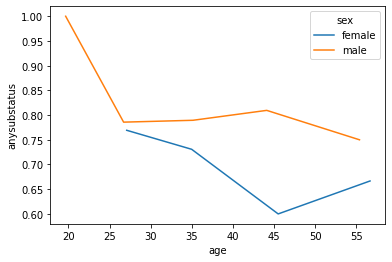

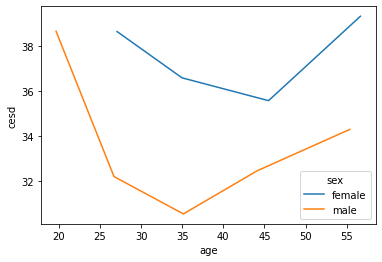

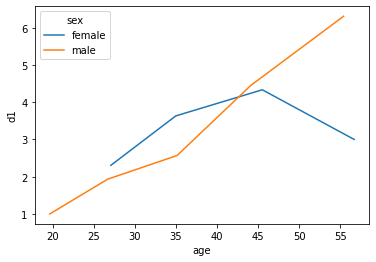

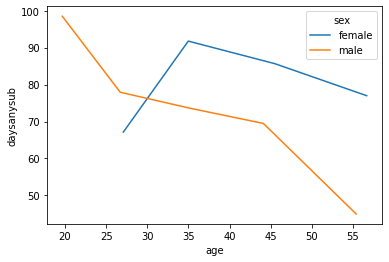

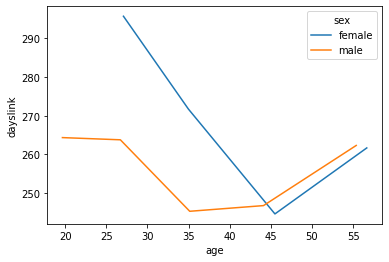

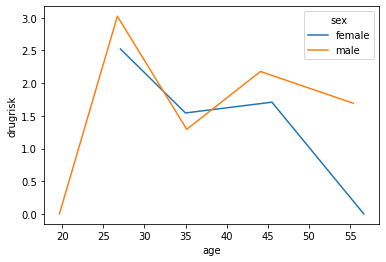

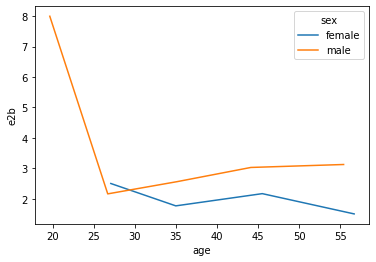

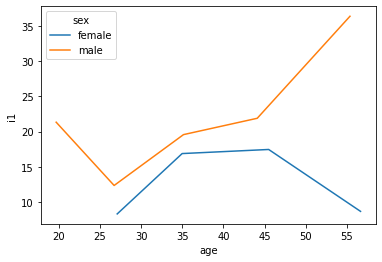

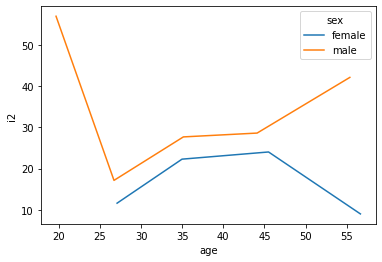

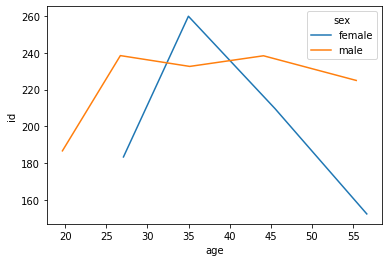

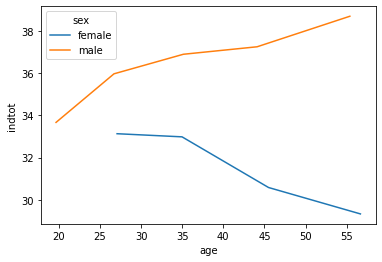

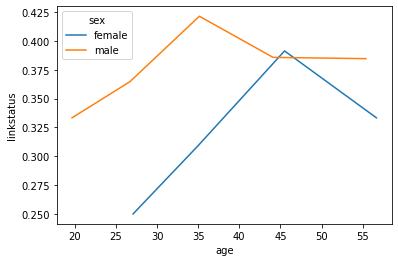

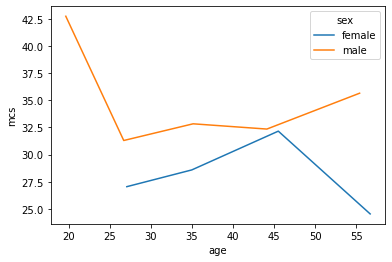

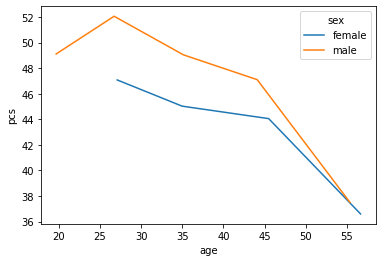

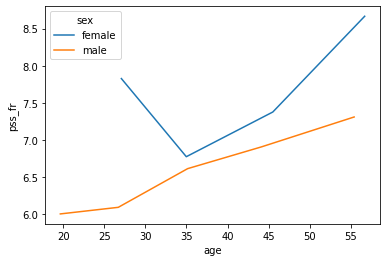

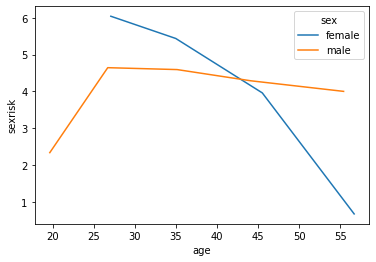

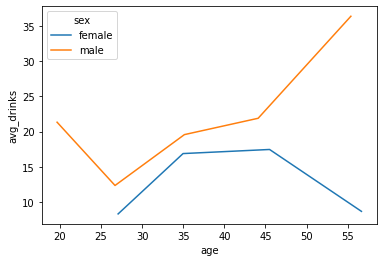

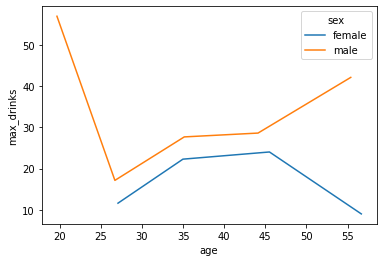

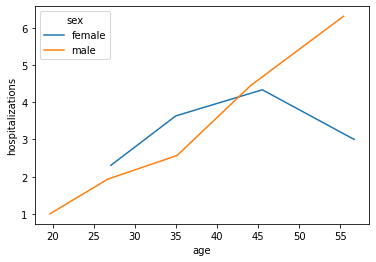

In [14]:
#generate a function
def plots(varibles):
   out=sns.lineplot(data=HELPrct3,x="age",y=varibles,hue="sex")
   return (plt.show())


# extract the column names
colnames=HELPrct3.columns.drop(['age']).drop(['female'])
colnames

# iterate
for i,n in enumerate(colnames):
  plots(n)
  plt.show()

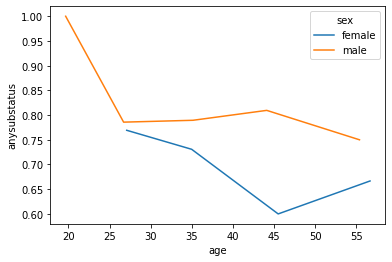

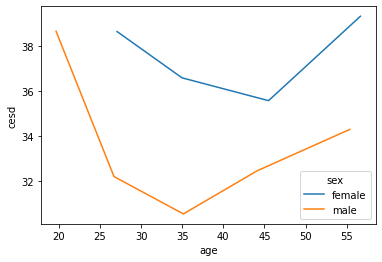

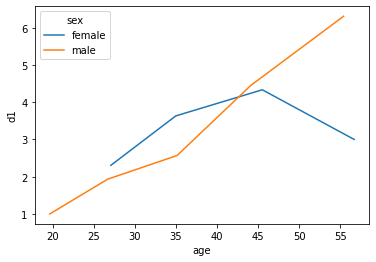

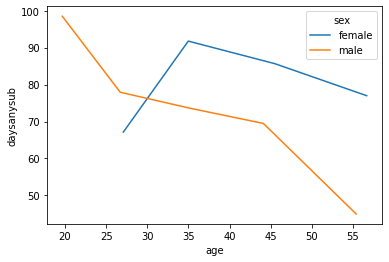

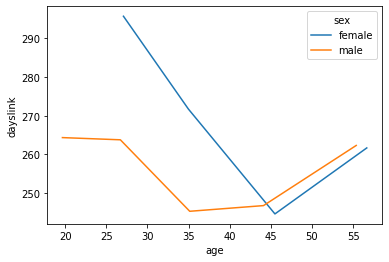

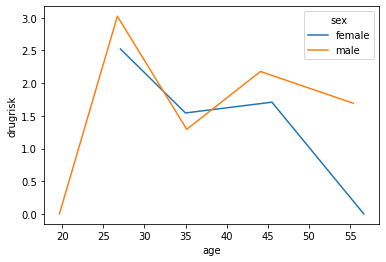

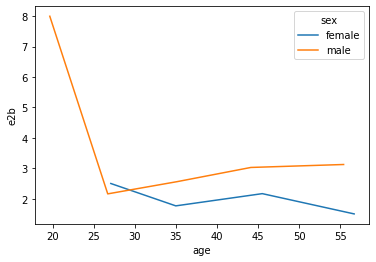

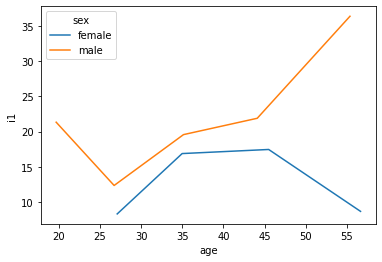

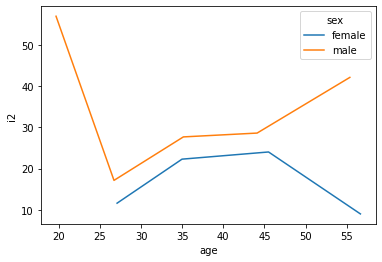

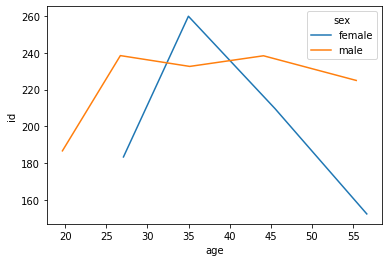

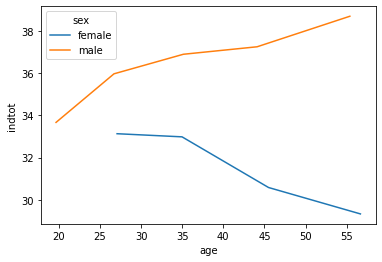

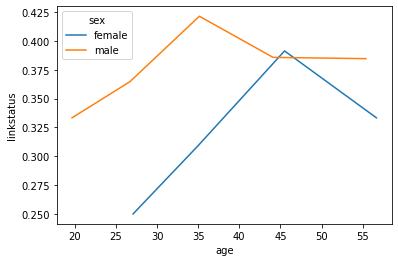

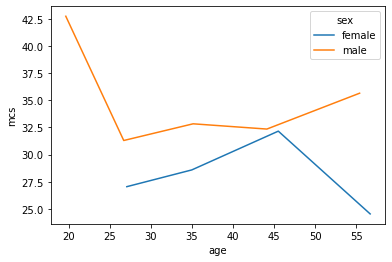

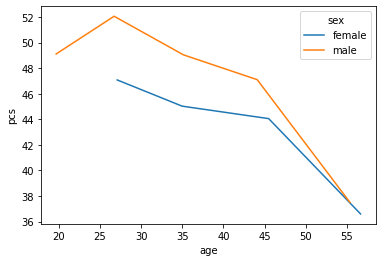

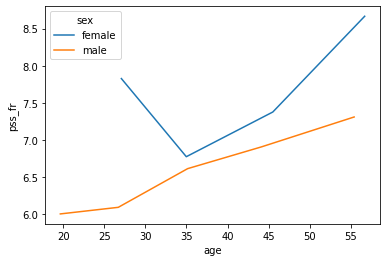

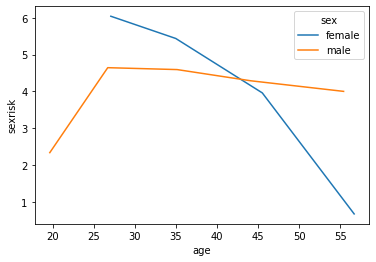

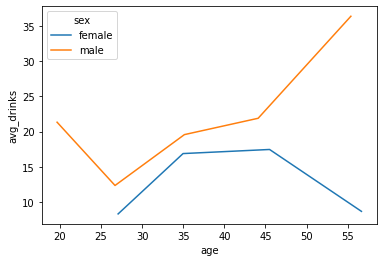

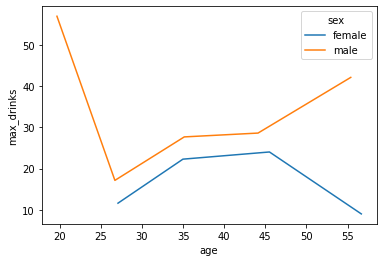

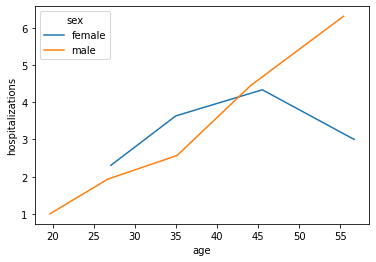

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [15]:
list(map(plots,colnames))

#2. The team IDs corresponding to Brooklyn baseball teams from the Teams data frame from the Lahman package are listed below. Use map int() to find the number of seasons in which each of those teams played by calling a function called count seasons. 



In [ ]:
bk_teams = ["BR1", "BR2", "BR3", "BR4", "BRO", "BRP", "BRF"]
print(bk_teams)

['BR1', 'BR2', 'BR3', 'BR4', 'BRO', 'BRP', 'BRF']


In [ ]:
def count_seasons (team_name):
   out = len(Teams[["yearID","lgID","teamID"]][Teams.teamID==team_name].groupby("yearID"))
   return(out)

# test
count_seasons("BR3")

6

In [ ]:
list(map(count_seasons,bk_teams))

[1, 4, 6, 1, 68, 1, 2]